In [1]:
#!pip install wbdata

# 1.Improt Necessary Libraires

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata 
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
#Gathering Data through API
wbdata.search_indicators("GDP")

id                          name
--------------------------  -------------------------------------------------------------------------------------------------------------------------------------------------------------------------
6.0.GDP_current             GDP (current $)
6.0.GDP_growth              GDP growth (annual %)
6.0.GDP_usd                 GDP (constant 2005 $)
6.0.GDPpc_constant          GDP per capita, PPP (constant 2011 international $)
BG.GSR.NFSV.GD.ZS           Trade in services (% of GDP)
BG.KAC.FNEI.GD.PP.ZS        Gross private capital flows (% of GDP, PPP)
BG.KAC.FNEI.GD.ZS           Gross private capital flows (% of GDP)
BG.KLT.DINV.GD.PP.ZS        Gross foreign direct investment (% of GDP, PPP)
BG.KLT.DINV.GD.ZS           Gross foreign direct investment (% of GDP)
BI.WAG.TOTL.GD.ZS           Wage bill as a percentage of GDP
BM.GSR.MRCH.ZS              Merchandise imports (BOP): percentage of GDP (%)
BM.KLT.DINV.GD.ZS           Foreign direct investment, net outfl

In [4]:
indicators = {'Indicator Name': [                      #Create a List to list out in the DataFrame
        'Gross Domestic Product (GDP)',
        'Gross National Income (GNI)',
        'Inflation rate',
        'Unemployment rate',
        'Poverty rate',
        'Life expectancy',
        'Literacy rate',
        'Access to electricity',
        'Mobile phone subscriptions',
        'Government expenditure on education',
        'Foreign direct investment (FDI)',
        'Exports of goods and services',
        'Imports of goods and services',
        'Gross capital formation',
        'Agricultural land area',
        'Agricultural production index'
    ],
    'Indicator ID': [
        'NY.GDP.MKTP.CD',
        'NY.GNP.MKTP.CD',
        'FP.CPI.TOTL.ZG',
        'SL.UEM.TOTL.ZS',
        'SI.POV.NAHC',
        'SP.DYN.LE00.IN',
        'SE.ADT.LITR.ZS',
        'EG.ELC.ACCS.ZS',
        'IT.CEL.SETS.P2',
        'SE.XPD.TOTL.GB.ZS',
        'BX.KLT.DINV.WD.GD.ZS',
        'NE.EXP.GNFS.ZS',
        'NE.IMP.GNFS.ZS',
        'NE.GDI.TOTL.ZS',
        'AG.LND.AGRI.ZS',
        'AG.PRD.FOOD.XD'
    ]
             }

In [5]:
indicators = pd.DataFrame(indicators)

In [6]:
indicators

,Indicator Name,Indicator ID
0,Gross Domestic Product (GDP),NY.GDP.MKTP.CD
1,Gross National Income (GNI),NY.GNP.MKTP.CD
2,Inflation rate,FP.CPI.TOTL.ZG
3,Unemployment rate,SL.UEM.TOTL.ZS
4,Poverty rate,SI.POV.NAHC
5,Life expectancy,SP.DYN.LE00.IN
6,Literacy rate,SE.ADT.LITR.ZS
7,Access to electricity,EG.ELC.ACCS.ZS
8,Mobile phone subscriptions,IT.CEL.SETS.P2
9,Government expenditure on education,SE.XPD.TOTL.GB.ZS


In [7]:
from datetime import datetime  #to convert into datetime

In [8]:
start_date = "2015-01-01"
end_data = "2020-12-31"
#convert string format to  datetiem format
start_date_obj = datetime.strptime(start_date,"%Y-%m-%d")
end_date_obj = datetime.strptime(end_data,"%Y-%m-%d")

data_date = (start_date_obj,end_date_obj)

In [9]:
data_date

(datetime.datetime(2015, 1, 1, 0, 0), datetime.datetime(2020, 12, 31, 0, 0))

In [10]:
new_df = pd.DataFrame() #Create empty DataFrame

In [11]:
pd.DataFrame(wbdata.get_data("NY.GDP.MKTP.CD",country="all",data_date=data_date,pandas=True)) 

value
country                     date              
Africa Eastern and Southern 2020  9.341791e+11
                            2019  1.009052e+12
                            2018  1.016697e+12
                            2017  1.030482e+12
                            2016  8.898593e+11
...                                        ...
Zimbabwe                    2019  2.183223e+10
                            2018  3.415607e+10
                            2017  1.758489e+10
                            2016  2.054868e+10
                            2015  1.996312e+10

[1596 rows x 1 columns]

In [12]:
indicators[indicators["Indicator ID"] == "NY.GDP.MKTP.CD"]["Indicator Name"].values[0]

'Gross Domestic Product (GDP)'

In [13]:
df = pd.DataFrame()  #Empty DataFrame

In [14]:
for i in indicators['Indicator ID']:
    new_df = wbdata.get_data(indicator=i, country='all', data_date=data_date, pandas=True)
    new_df = pd.DataFrame(new_df).reset_index()
    new_df.columns = ['country','year',indicators[indicators['Indicator ID'] == i]['Indicator Name'].values[0]]
    df = pd.concat([df,new_df],axis=1)

In [15]:
df.head()

,country,year,Gross Domestic Product (GDP),country,year,Gross National Income (GNI),country,year,Inflation rate,country,...,Imports of goods and services,country,year,Gross capital formation,country,year,Agricultural land area,country,year,Agricultural production index
0,Africa Eastern and Southern,2020,9.341791e+11,Africa Eastern and Southern,2020,9.108854e+11,Africa Eastern and Southern,2020,6.362961,Africa Eastern and Southern,...,23.312332,Africa Eastern and Southern,2020,20.828152,Africa Eastern and Southern,2020,44.248721,Africa Eastern and Southern,2020,NaN
1,Africa Eastern and Southern,2019,1.009052e+12,Africa Eastern and Southern,2019,9.790544e+11,Africa Eastern and Southern,2019,4.120246,Africa Eastern and Southern,...,26.243826,Africa Eastern and Southern,2019,22.340824,Africa Eastern and Southern,2019,44.194846,Africa Eastern and Southern,2019,NaN
2,Africa Eastern and Southern,2018,1.016697e+12,Africa Eastern and Southern,2018,9.847945e+11,Africa Eastern and Southern,2018,4.720811,Africa Eastern and Southern,...,28.042392,Africa Eastern and Southern,2018,21.657871,Africa Eastern and Southern,2018,44.168345,Africa Eastern and Southern,2018,NaN
3,Africa Eastern and Southern,2017,1.030482e+12,Africa Eastern and Southern,2017,9.977387e+11,Africa Eastern and Southern,2017,6.399343,Africa Eastern and Southern,...,24.622669,Africa Eastern and Southern,2017,24.323035,Africa Eastern and Southern,2017,44.045088,Africa Eastern and Southern,2017,NaN
4,Africa Eastern and Southern,2016,8.898593e+11,Africa Eastern and Southern,2016,8.660085e+11,Africa Eastern and Southern,2016,6.571396,Africa Eastern and Southern,...,26.073666,Africa Eastern and Southern,2016,23.615302,Africa Eastern and Southern,2016,43.901452,Africa Eastern and Southern,2016,NaN


In [16]:
#Drop the extra Columns 
df_1 =  df.copy() #Copy the data

In [17]:
df_1.columns

Index(['country', 'year', 'Gross Domestic Product (GDP)', 'country', 'year',
       'Gross National Income (GNI)', 'country', 'year', 'Inflation rate',
       'country', 'year', 'Unemployment rate', 'country', 'year',
       'Poverty rate', 'country', 'year', 'Life expectancy', 'country', 'year',
       'Literacy rate', 'country', 'year', 'Access to electricity', 'country',
       'year', 'Mobile phone subscriptions', 'country', 'year',
       'Government expenditure on education', 'country', 'year',
       'Foreign direct investment (FDI)', 'country', 'year',
       'Exports of goods and services', 'country', 'year',
       'Imports of goods and services', 'country', 'year',
       'Gross capital formation', 'country', 'year', 'Agricultural land area',
       'country', 'year', 'Agricultural production index'],
      dtype='object')

In [18]:
df_1 = df_1.drop(['country', 'year'],axis=1)

In [19]:
df_1.head()

,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,9.341791e+11,9.108854e+11,6.362961,7.631303,NaN,63.313856,71.889908,45.609604,71.060934,14.564090,1.391215,21.935530,23.312332,20.828152,44.248721,NaN
1,1.009052e+12,9.790544e+11,4.120246,7.121664,NaN,63.755674,71.574051,44.073912,68.736999,15.352720,1.502550,23.648534,26.243826,22.340824,44.194846,NaN
2,1.016697e+12,9.847945e+11,4.720811,6.913046,NaN,63.365858,70.420250,42.880977,72.317182,17.306705,1.345067,25.155445,28.042392,21.657871,44.168345,NaN
3,1.030482e+12,9.977387e+11,6.399343,6.940365,NaN,62.922385,69.999451,40.092163,64.222619,17.150761,0.990430,21.575106,24.622669,24.323035,44.045088,NaN
4,8.898593e+11,8.660085e+11,6.571396,6.855589,NaN,62.444045,70.059601,38.733352,64.284955,17.198811,1.896000,21.545671,26.073666,23.615302,43.901452,NaN


In [20]:
#We cannot remain one column of Country and Year 
# Concat Country and Year again.
df.iloc[:,0:2]

,country,year
0,Africa Eastern and Southern,2020
1,Africa Eastern and Southern,2019
2,Africa Eastern and Southern,2018
3,Africa Eastern and Southern,2017
4,Africa Eastern and Southern,2016
...,...,...
1591,Zimbabwe,2019
1592,Zimbabwe,2018
1593,Zimbabwe,2017
1594,Zimbabwe,2016


In [21]:
df_1 = pd.concat([df.iloc[:,0:2],df_1],axis=1)

In [22]:
df_1

,country,year,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,Africa Eastern and Southern,2020,9.341791e+11,9.108854e+11,6.362961,7.631303,NaN,63.313856,71.889908,45.609604,71.060934,14.564090,1.391215,21.935530,23.312332,20.828152,44.248721,NaN
1,Africa Eastern and Southern,2019,1.009052e+12,9.790544e+11,4.120246,7.121664,NaN,63.755674,71.574051,44.073912,68.736999,15.352720,1.502550,23.648534,26.243826,22.340824,44.194846,NaN
2,Africa Eastern and Southern,2018,1.016697e+12,9.847945e+11,4.720811,6.913046,NaN,63.365858,70.420250,42.880977,72.317182,17.306705,1.345067,25.155445,28.042392,21.657871,44.168345,NaN
3,Africa Eastern and Southern,2017,1.030482e+12,9.977387e+11,6.399343,6.940365,NaN,62.922385,69.999451,40.092163,64.222619,17.150761,0.990430,21.575106,24.622669,24.323035,44.045088,NaN
4,Africa Eastern and Southern,2016,8.898593e+11,8.660085e+11,6.571396,6.855589,NaN,62.444045,70.059601,38.733352,64.284955,17.198811,1.896000,21.545671,26.073666,23.615302,43.901452,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,Zimbabwe,2019,2.183223e+10,2.148784e+10,255.304991,7.370000,38.3,61.292000,NaN,46.781475,85.940989,NaN,1.142806,27.163459,25.524111,13.799352,41.876696,105.55
1592,Zimbabwe,2018,3.415607e+10,3.344290e+10,10.618866,6.784000,NaN,61.414000,NaN,45.572647,85.761588,19.039841,2.101721,26.163973,28.386297,14.148306,41.876696,108.86
1593,Zimbabwe,2017,1.758489e+10,1.559375e+10,0.893962,6.279000,30.4,60.709000,NaN,44.178635,95.532557,20.874201,1.746885,19.658905,30.370807,9.700147,41.876696,106.55
1594,Zimbabwe,2016,2.054868e+10,1.800259e+10,-1.543670,5.796000,NaN,60.306000,NaN,42.561729,89.110840,23.527081,1.669274,19.943532,31.275493,9.861371,41.876696,101.92


In [23]:
#Dataset contains   all the countries, But we want only countries which are pertaining to G20(#Group of 20countires for economic and other social operation )
Countries = ['Argentina', 'Australia','Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Republic of Korea', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'Turkiye', 'United Kingdom', 'United States']

In [24]:
#Filter the data
dff = df_1[df_1['country'].isin(Countries)]

In [25]:
dff

,country,year,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
336,Argentina,2020,3.855402e+11,3.755358e+11,NaN,11.460,42.0,75.892000,NaN,100.000000,121.600189,11.91690,1.224943,16.610872,13.608927,14.130595,39.603229,109.35
337,Argentina,2019,4.477546e+11,4.301667e+11,NaN,9.840,35.5,77.284000,NaN,100.000000,125.940981,12.53007,1.485007,17.924878,14.705737,14.210030,39.603229,112.59
338,Argentina,2018,5.248197e+11,5.060939e+11,NaN,9.220,32.0,76.999000,99.003868,99.989578,131.937169,12.52334,2.232532,14.436686,16.325850,16.613885,39.603229,97.49
339,Argentina,2017,6.436287e+11,6.272007e+11,NaN,8.350,25.7,76.833000,NaN,100.000000,140.501461,13.26392,1.789364,11.320283,13.969318,18.212567,40.647424,106.03
340,Argentina,2016,5.575314e+11,5.452507e+11,NaN,8.109,30.3,76.308000,99.125008,99.849579,145.917957,13.35554,0.584750,12.527095,13.566793,17.663228,41.716051,100.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,United States,2019,2.138098e+13,2.176454e+13,1.812210,3.670,NaN,78.787805,NaN,100.000000,106.414019,13.38055,1.472075,11.872470,14.579479,21.319232,44.363367,99.65
1532,United States,2018,2.053306e+13,2.093736e+13,2.442583,3.900,NaN,78.639024,NaN,100.000000,104.847944,13.14618,1.045704,12.360989,15.249390,21.205917,44.363367,103.20
1533,United States,2017,1.947734e+13,1.988555e+13,2.130110,4.360,NaN,78.539024,NaN,100.000000,103.129789,13.86467,1.955211,12.261738,15.017423,20.813431,44.363367,101.96
1534,United States,2016,1.869511e+13,1.902048e+13,1.261583,4.870,NaN,78.539024,NaN,100.000000,103.370250,13.15421,2.537498,11.939539,14.647461,20.566778,44.303705,104.86


In [26]:
dff.shape

(102, 18)

In [27]:
dff.index

Int64Index([ 336,  337,  338,  339,  340,  341,  354,  355,  356,  357,
            ...
            1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535],
           dtype='int64', length=102)

In [28]:
dff.reset_index(drop=True,inplace=True)

In [29]:
dff

,country,year,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index
0,Argentina,2020,3.855402e+11,3.755358e+11,NaN,11.460,42.0,75.892000,NaN,100.000000,121.600189,11.91690,1.224943,16.610872,13.608927,14.130595,39.603229,109.35
1,Argentina,2019,4.477546e+11,4.301667e+11,NaN,9.840,35.5,77.284000,NaN,100.000000,125.940981,12.53007,1.485007,17.924878,14.705737,14.210030,39.603229,112.59
2,Argentina,2018,5.248197e+11,5.060939e+11,NaN,9.220,32.0,76.999000,99.003868,99.989578,131.937169,12.52334,2.232532,14.436686,16.325850,16.613885,39.603229,97.49
3,Argentina,2017,6.436287e+11,6.272007e+11,NaN,8.350,25.7,76.833000,NaN,100.000000,140.501461,13.26392,1.789364,11.320283,13.969318,18.212567,40.647424,106.03
4,Argentina,2016,5.575314e+11,5.452507e+11,NaN,8.109,30.3,76.308000,99.125008,99.849579,145.917957,13.35554,0.584750,12.527095,13.566793,17.663228,41.716051,100.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,United States,2019,2.138098e+13,2.176454e+13,1.812210,3.670,NaN,78.787805,NaN,100.000000,106.414019,13.38055,1.472075,11.872470,14.579479,21.319232,44.363367,99.65
98,United States,2018,2.053306e+13,2.093736e+13,2.442583,3.900,NaN,78.639024,NaN,100.000000,104.847944,13.14618,1.045704,12.360989,15.249390,21.205917,44.363367,103.20
99,United States,2017,1.947734e+13,1.988555e+13,2.130110,4.360,NaN,78.539024,NaN,100.000000,103.129789,13.86467,1.955211,12.261738,15.017423,20.813431,44.363367,101.96
100,United States,2016,1.869511e+13,1.902048e+13,1.261583,4.870,NaN,78.539024,NaN,100.000000,103.370250,13.15421,2.537498,11.939539,14.647461,20.566778,44.303705,104.86


## 2.Exploring the Data

In [30]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              102 non-null    object 
 1   year                                 102 non-null    object 
 2   Gross Domestic Product (GDP)         102 non-null    float64
 3   Gross National Income (GNI)          102 non-null    float64
 4   Inflation rate                       96 non-null     float64
 5   Unemployment rate                    102 non-null    float64
 6   Poverty rate                         37 non-null     float64
 7   Life expectancy                      102 non-null    float64
 8   Literacy rate                        30 non-null     float64
 9   Access to electricity                102 non-null    float64
 10  Mobile phone subscriptions           102 non-null    float64
 11  Government expenditure on educat

In [31]:
dff.columns

Index(['country', 'year', 'Gross Domestic Product (GDP)',
       'Gross National Income (GNI)', 'Inflation rate', 'Unemployment rate',
       'Poverty rate', 'Life expectancy', 'Literacy rate',
       'Access to electricity', 'Mobile phone subscriptions',
       'Government expenditure on education',
       'Foreign direct investment (FDI)', 'Exports of goods and services',
       'Imports of goods and services', 'Gross capital formation',
       'Agricultural land area', 'Agricultural production index'],
      dtype='object')

In [32]:
 dff['year'] = pd.to_datetime(dff['year'])

In [33]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              102 non-null    object        
 1   year                                 102 non-null    datetime64[ns]
 2   Gross Domestic Product (GDP)         102 non-null    float64       
 3   Gross National Income (GNI)          102 non-null    float64       
 4   Inflation rate                       96 non-null     float64       
 5   Unemployment rate                    102 non-null    float64       
 6   Poverty rate                         37 non-null     float64       
 7   Life expectancy                      102 non-null    float64       
 8   Literacy rate                        30 non-null     float64       
 9   Access to electricity                102 non-null    float64       
 10  Mobile phone s

## 3.Descriptive Summary

In [34]:
dff.describe().T

,count,mean,std,min,25%,50%,75%,max
Gross Domestic Product (GDP),102.0,3.571764e+12,5.018684e+12,3.235855e+11,9.528127e+11,1.819426e+12,2.872879e+12,2.138098e+13
Gross National Income (GNI),102.0,3.597522e+12,5.097717e+12,3.152941e+11,9.223936e+11,1.795642e+12,2.855828e+12,2.176454e+13
Inflation rate,96.0,2.853051e+00,3.109839e+00,-2.093333e+00,1.026316e+00,1.948958e+00,3.643184e+00,1.633246e+01
Unemployment rate,102.0,7.762647e+00,5.079605e+00,2.350000e+00,4.337500e+00,5.960000e+00,9.922500e+00,2.554000e+01
Poverty rate,37.0,1.707568e+01,1.112965e+01,0.000000e+00,1.060000e+01,1.440000e+01,2.030000e+01,4.390000e+01
Life expectancy,102.0,7.743796e+01,5.241520e+00,6.395000e+01,7.450200e+01,7.765350e+01,8.190463e+01,8.456000e+01
Literacy rate,30.0,9.488450e+01,4.619322e+00,7.437299e+01,9.456912e+01,9.537844e+01,9.681622e+01,9.934910e+01
Access to electricity,102.0,9.854558e+01,3.961923e+00,8.390000e+01,9.970272e+01,1.000000e+02,1.000000e+02,1.000000e+02
Mobile phone subscriptions,102.0,1.165805e+02,2.220258e+01,7.567324e+01,9.754518e+01,1.168978e+02,1.308190e+02,1.669433e+02
Government expenditure on education,97.0,1.358730e+01,3.778289e+00,7.310000e+00,1.099916e+01,1.326392e+01,1.621811e+01,2.494862e+01


In [35]:
#Create two column with Normalized Scale
dff['GDP_BN'] = dff['Gross Domestic Product (GDP)']/(10**9)
dff['GNI_BN'] = dff['Gross National Income (GNI)']/(10**9)

In [36]:
selected_cols = dff.columns[4:]

In [37]:
selected_cols

Index(['Inflation rate', 'Unemployment rate', 'Poverty rate',
       'Life expectancy', 'Literacy rate', 'Access to electricity',
       'Mobile phone subscriptions', 'Government expenditure on education',
       'Foreign direct investment (FDI)', 'Exports of goods and services',
       'Imports of goods and services', 'Gross capital formation',
       'Agricultural land area', 'Agricultural production index', 'GDP_BN',
       'GNI_BN'],
      dtype='object')

In [38]:
dff[selected_cols].describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Inflation rate,96.0,3.0,3.0,-2.0,1.0,2.0,4.0,16.0
Unemployment rate,102.0,8.0,5.0,2.0,4.0,6.0,10.0,26.0
Poverty rate,37.0,17.0,11.0,0.0,11.0,14.0,20.0,44.0
Life expectancy,102.0,77.0,5.0,64.0,75.0,78.0,82.0,85.0
Literacy rate,30.0,95.0,5.0,74.0,95.0,95.0,97.0,99.0
Access to electricity,102.0,99.0,4.0,84.0,100.0,100.0,100.0,100.0
Mobile phone subscriptions,102.0,117.0,22.0,76.0,98.0,117.0,131.0,167.0
Government expenditure on education,97.0,14.0,4.0,7.0,11.0,13.0,16.0,25.0
Foreign direct investment (FDI),102.0,2.0,2.0,-1.0,1.0,2.0,3.0,12.0
Exports of goods and services,102.0,25.0,9.0,10.0,18.0,26.0,31.0,47.0


## 4.Distribution - Histrogram

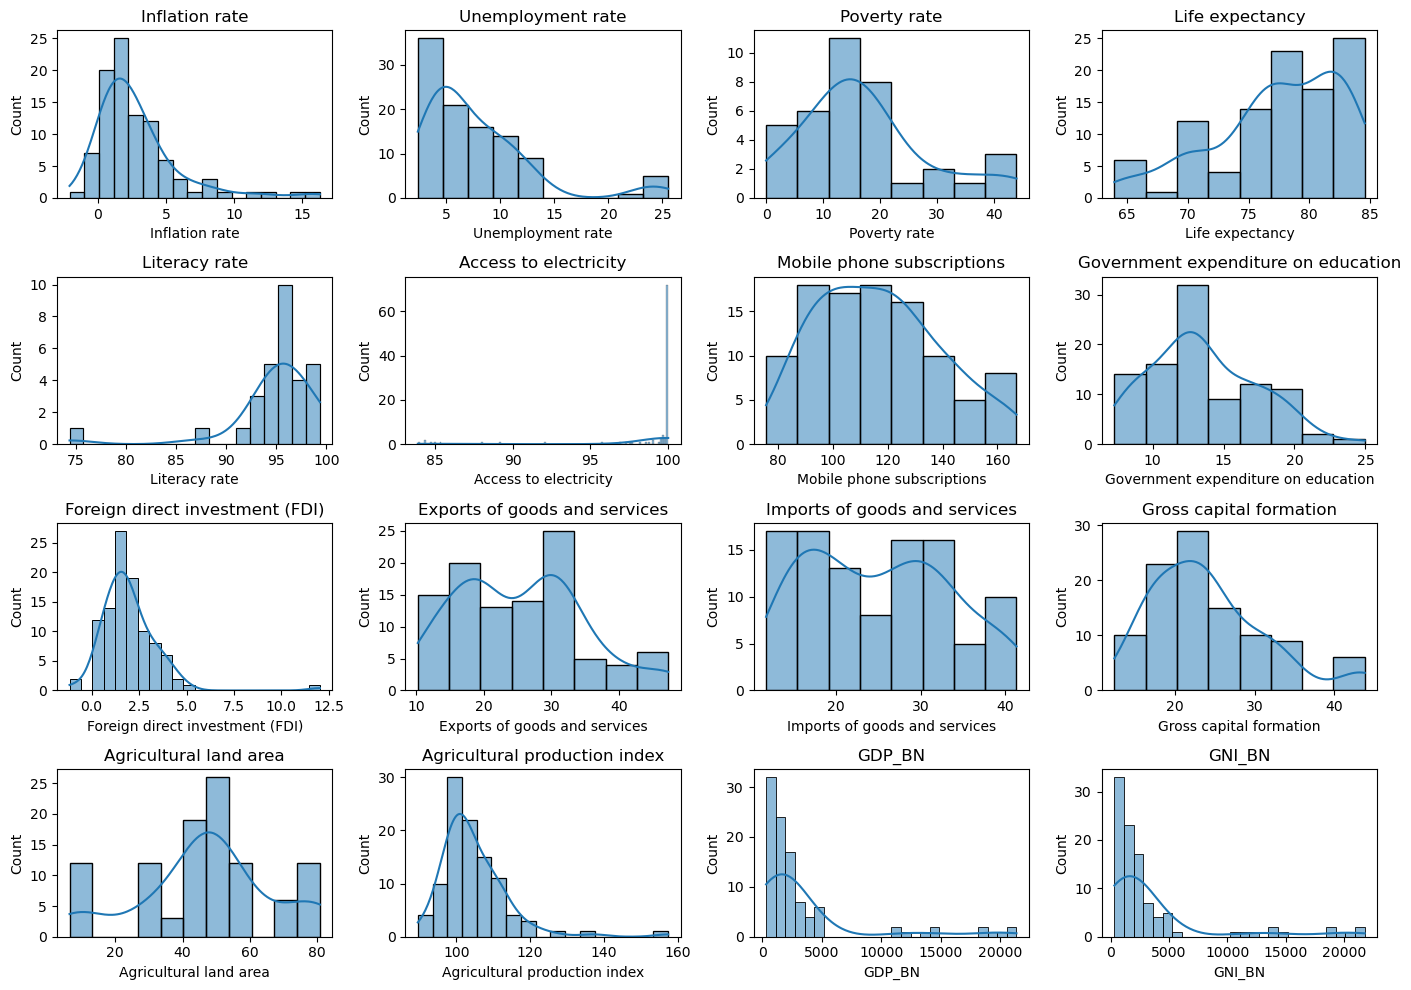

In [39]:
fig,axs = plt.subplots(nrows=4, ncols = 4,figsize=(14,10))
axs = axs.flatten()

for i,col in enumerate(selected_cols):
    sns.histplot(data= dff,x=col,kde=True,ax=axs[i])
    axs[i].set_title(col)
    
plt.tight_layout()
plt.show()

## 6.Skewness

In [40]:
#Skewness
dff[selected_cols].skew().sort_values()

Literacy rate                         -3.264460
Access to electricity                 -2.974697
Life expectancy                       -0.771439
Agricultural land area                -0.246207
Imports of goods and services          0.222309
Mobile phone subscriptions             0.376188
Exports of goods and services          0.419613
Government expenditure on education    0.475650
Poverty rate                           0.882033
Gross capital formation                1.001662
Unemployment rate                      1.964813
Inflation rate                         2.161412
GDP_BN                                 2.456103
GNI_BN                                 2.469637
Agricultural production index          2.502468
Foreign direct investment (FDI)        2.880514
dtype: float64

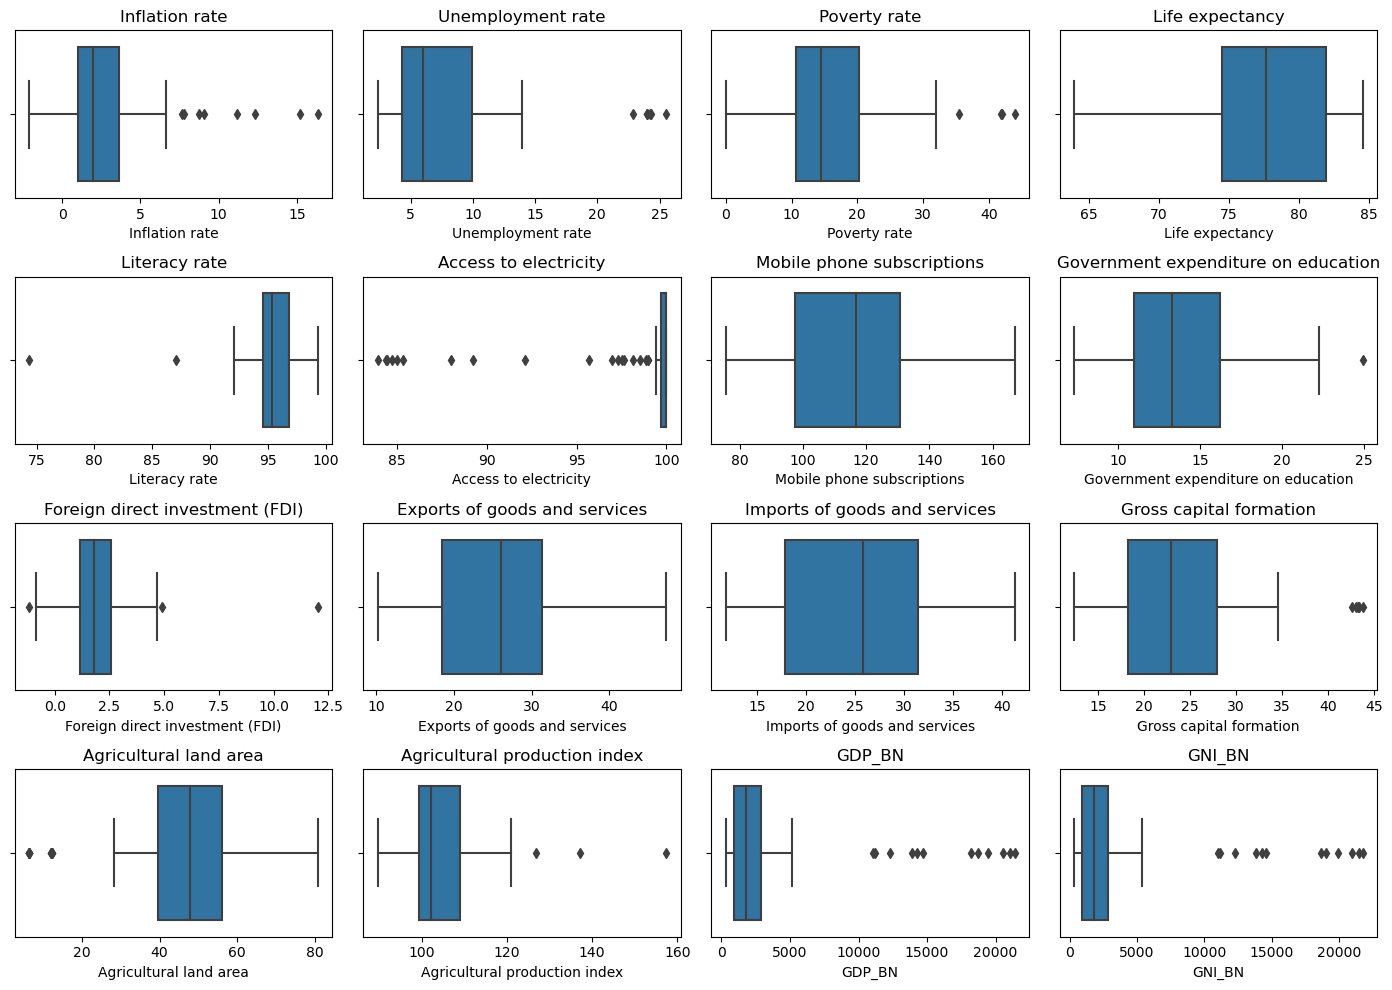

In [41]:
 fig,axs = plt.subplots(nrows=4, ncols = 4,figsize=(14,10))
axs = axs.flatten()

for i,col in enumerate(selected_cols):
    sns.boxplot(data= dff,x=col,ax=axs[i])
    axs[i].set_title(col)
    
plt.tight_layout()
plt.show()

## 7.Outliers Proportion

In [42]:
def outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    return (x < q1 -1.5*iqr) | (x > q3 + 1.5 * iqr)


In [43]:
outlier_percentages = []

for col in selected_cols:
    x = dff[col]
    outliers = outlier(x)
    outlier_percentage = np.mean(outliers)*100
    outlier_percentages.append(outlier_percentage)
    
    
result_df = pd.DataFrame({'Column': selected_cols, 'Outlier Percentage': outlier_percentages})
result_df = result_df.sort_values('Outlier Percentage', ascending=False)

In [44]:
result_df.round()

,Column,Outlier Percentage
5,Access to electricity,19.0
12,Agricultural land area,12.0
14,GDP_BN,12.0
15,GNI_BN,12.0
0,Inflation rate,8.0
1,Unemployment rate,6.0
11,Gross capital formation,6.0
2,Poverty rate,4.0
8,Foreign direct investment (FDI),3.0
13,Agricultural production index,3.0


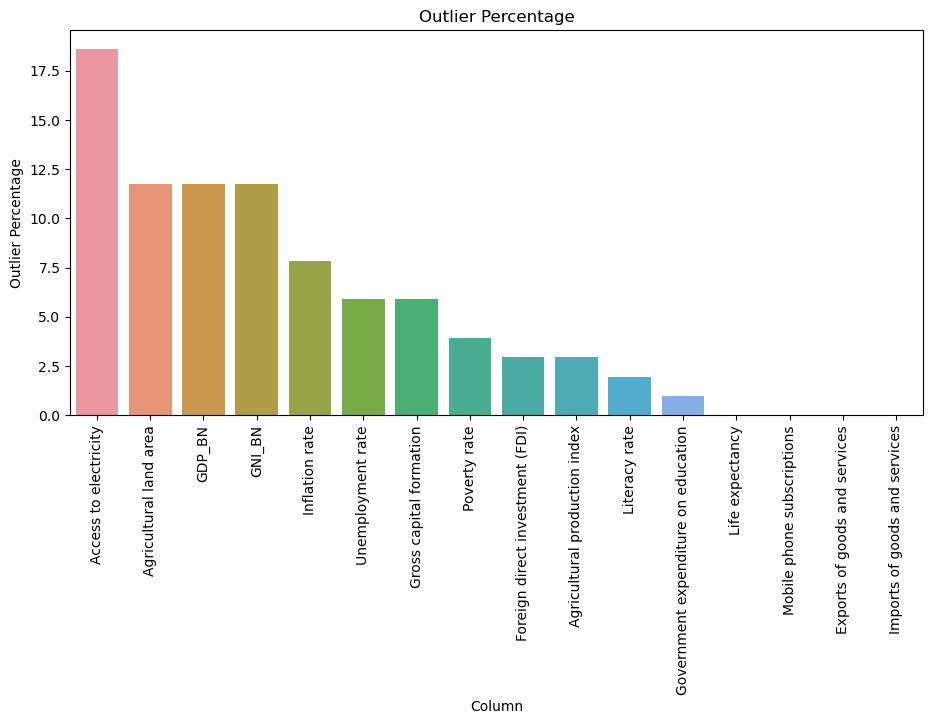

In [45]:
plt.figure(figsize=(11,5))
sns.barplot(x=result_df['Column'],y=result_df['Outlier Percentage'])
plt.title("Outlier Percentage")
plt.xticks(rotation=90)
plt.show()

## 8.Null Values

In [46]:
dff.isnull().sum() #Ignoring the Null Values

country                                 0
year                                    0
Gross Domestic Product (GDP)            0
Gross National Income (GNI)             0
Inflation rate                          6
Unemployment rate                       0
Poverty rate                           65
Life expectancy                         0
Literacy rate                          72
Access to electricity                   0
Mobile phone subscriptions              0
Government expenditure on education     5
Foreign direct investment (FDI)         0
Exports of goods and services           0
Imports of goods and services           0
Gross capital formation                 0
Agricultural land area                  0
Agricultural production index           0
GDP_BN                                  0
GNI_BN                                  0
dtype: int64

##  9.Correlation

In [47]:
dff.corr()

,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,Mobile phone subscriptions,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index,GDP_BN,GNI_BN
Gross Domestic Product (GDP),1.000000,0.999877,-0.220273,-0.303781,-0.611398,0.168106,0.046011,0.191673,-0.153444,-0.236657,-0.056105,-0.376812,-0.369748,0.256211,-0.050011,-0.177022,1.000000,0.999877
Gross National Income (GNI),0.999877,1.000000,-0.222626,-0.303830,-0.611641,0.171477,0.047395,0.191853,-0.149559,-0.238792,-0.059212,-0.375439,-0.368266,0.248886,-0.053373,-0.178402,0.999877,1.000000
Inflation rate,-0.220273,-0.222626,1.000000,0.362163,0.003216,-0.452413,-0.057579,-0.206291,-0.205852,0.256418,0.024209,-0.084005,-0.003670,0.093014,0.084598,0.215174,-0.220273,-0.222626
Unemployment rate,-0.303781,-0.303830,0.362163,1.000000,0.284413,-0.507984,-0.169202,-0.720303,0.278397,0.244594,-0.169886,-0.042598,-0.047417,-0.400515,0.317747,0.076464,-0.303781,-0.303830
Poverty rate,-0.611398,-0.611641,0.003216,0.284413,1.000000,0.016431,0.118925,0.161490,0.084313,-0.073877,0.049692,0.203722,0.218712,-0.808758,-0.183260,0.145972,-0.611398,-0.611641
Life expectancy,0.168106,0.171477,-0.452413,-0.507984,0.016431,1.000000,0.445276,0.725869,-0.109543,-0.751602,0.072021,0.161771,0.143661,-0.086068,-0.385762,-0.311653,0.168106,0.171477
Literacy rate,0.046011,0.047395,-0.057579,-0.169202,0.118925,0.445276,1.000000,0.345048,0.234496,-0.323504,-0.058952,0.059160,-0.011952,-0.037390,-0.163344,-0.066947,0.046011,0.047395
Access to electricity,0.191673,0.191853,-0.206291,-0.720303,0.161490,0.725869,0.345048,1.000000,-0.306672,-0.449921,0.168501,0.022973,0.011837,0.129710,-0.415748,0.004245,0.191673,0.191853
Mobile phone subscriptions,-0.153444,-0.149559,-0.205852,0.278397,0.084313,-0.109543,0.234496,-0.306672,1.000000,0.032196,-0.253239,-0.004967,-0.117773,-0.217382,0.178642,-0.165989,-0.153444,-0.149559
Government expenditure on education,-0.236657,-0.238792,0.256418,0.244594,-0.073877,-0.751602,-0.323504,-0.449921,0.032196,1.000000,0.037563,-0.054370,-0.051382,0.066868,0.455042,0.407413,-0.236657,-0.238792


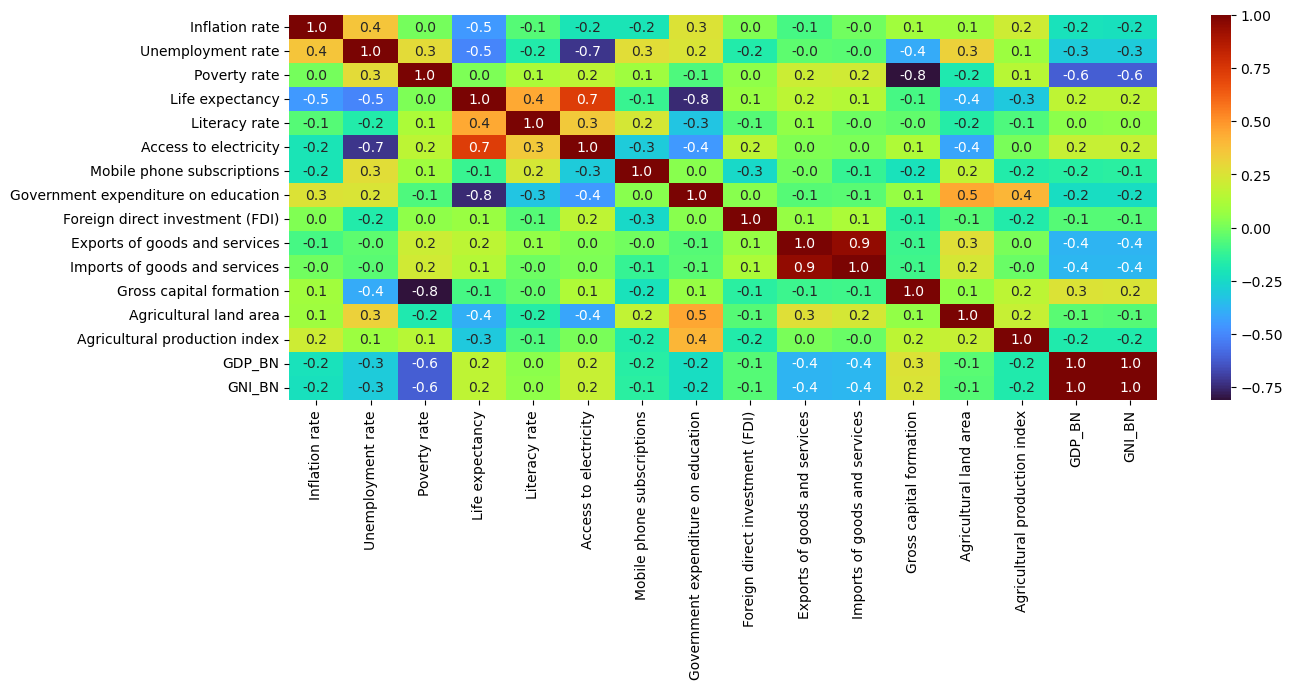

In [48]:
plt.figure(figsize=(14,5))
sns.heatmap(dff[selected_cols].corr(),annot=True,fmt=".1f",cmap="turbo")
plt.show()

##  10.JoinPlot

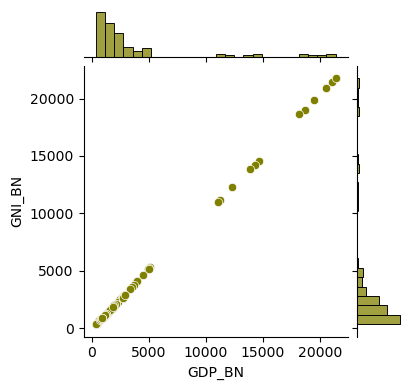

In [49]:
sns.jointplot(x="GDP_BN",y="GNI_BN",data=dff,height=4,color ="olive")
plt.show()

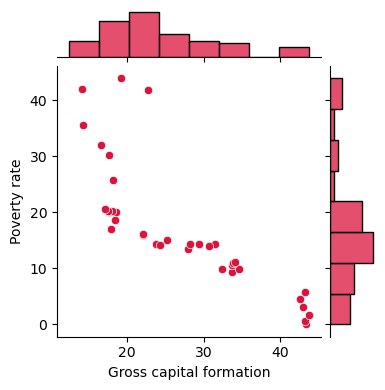

In [50]:
 sns.jointplot(x='Gross capital formation',y="Poverty rate",data=dff,height=4,color ="crimson")
plt.show()

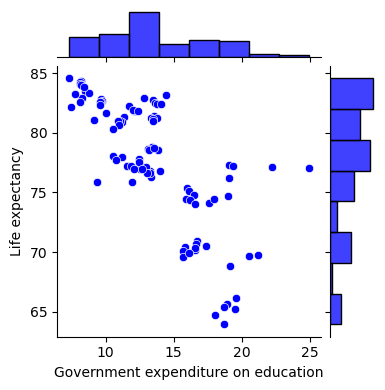

In [51]:
sns.jointplot(x='Government expenditure on education', y='Life expectancy', data=dff, height=4, color='blue')
plt.show()

## 11.Top 3 Countries

In [52]:
def top_3(data, parameter):
    year_list = data['year'].dt.year.sort_values().unique()
    result_df = pd.DataFrame(columns=year_list,index=[1,2,3])
    
    for year in year_list:
        df_year = data[data['year'].dt.year == year]
        value = df_year.groupby('country')[parameter].sum().sort_values(ascending=False).head(3).index
        result_df[year] = value
    
    return result_df

In [53]:
from IPython.display import display

In [54]:
for i in selected_cols:
    result = top_3(dff,i)
    print(i)
    display(result)
    print('-------------------------------------------------')

Inflation rate


,2015,2016,2017,2018,2019,2020
1,Brazil,Brazil,Turkiye,Turkiye,Turkiye,Turkiye
2,Turkiye,Turkiye,Mexico,Mexico,South Africa,India
3,Indonesia,South Africa,South Africa,South Africa,Brazil,Saudi Arabia


-------------------------------------------------
Unemployment rate


,2015,2016,2017,2018,2019,2020
1,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa
2,Italy,Brazil,Brazil,Brazil,Turkiye,Brazil
3,France,Italy,Italy,Turkiye,Brazil,Turkiye


-------------------------------------------------
Poverty rate


,2015,2016,2017,2018,2019,2020
1,Italy,Argentina,Argentina,Mexico,Argentina,Mexico
2,Turkiye,Italy,Italy,Argentina,Italy,Argentina
3,Indonesia,United Kingdom,United Kingdom,Italy,Germany,Italy


-------------------------------------------------
Life expectancy


,2015,2016,2017,2018,2019,2020
1,Japan,Japan,Japan,Japan,Japan,Japan
2,Italy,Italy,Italy,Italy,Italy,Australia
3,Australia,France,France,Australia,Australia,Italy


-------------------------------------------------
Literacy rate


,2015,2016,2017,2018,2019,2020
1,Argentina,Argentina,Turkiye,Italy,Italy,Saudi Arabia
2,Turkiye,Turkiye,Saudi Arabia,Argentina,Turkiye,China
3,Indonesia,Indonesia,Mexico,China,South Africa,Indonesia


-------------------------------------------------
Access to electricity


,2015,2016,2017,2018,2019,2020
1,United States,United States,Argentina,United States,Argentina,Argentina
2,Saudi Arabia,United Kingdom,Australia,Saudi Arabia,Australia,Australia
3,Canada,Canada,United Kingdom,United Kingdom,United Kingdom,United Kingdom


-------------------------------------------------
Mobile phone subscriptions


,2015,2016,2017,2018,2019,2020
1,Saudi Arabia,Indonesia,Indonesia,South Africa,South Africa,South Africa
2,South Africa,South Africa,South Africa,Japan,Japan,Japan
3,Italy,Argentina,Argentina,Italy,Italy,Indonesia


-------------------------------------------------
Government expenditure on education


,2015,2016,2017,2018,2019,2020
1,Indonesia,Saudi Arabia,Saudi Arabia,Saudi Arabia,South Africa,South Africa
2,Mexico,Indonesia,South Africa,South Africa,Saudi Arabia,Indonesia
3,South Africa,South Africa,Mexico,India,Indonesia,Saudi Arabia


-------------------------------------------------
Foreign direct investment (FDI)


,2015,2016,2017,2018,2019,2020
1,Canada,United Kingdom,United Kingdom,Australia,Brazil,United Kingdom
2,Brazil,Brazil,Australia,Germany,Canada,Germany
3,Australia,Mexico,Brazil,Brazil,Australia,Mexico


-------------------------------------------------
Exports of goods and services


,2015,2016,2017,2018,2019,2020
1,Germany,Germany,Germany,Germany,Germany,Germany
2,Mexico,Mexico,Mexico,Mexico,Mexico,Mexico
3,Saudi Arabia,Canada,Saudi Arabia,Saudi Arabia,Saudi Arabia,Italy


-------------------------------------------------
Imports of goods and services


,2015,2016,2017,2018,2019,2020
1,Germany,Mexico,Germany,Mexico,Germany,Mexico
2,Saudi Arabia,Germany,Mexico,Germany,Mexico,Germany
3,Mexico,Canada,Canada,Canada,Canada,Turkiye


-------------------------------------------------
Gross capital formation


,2015,2016,2017,2018,2019,2020
1,China,China,China,China,China,China
2,Saudi Arabia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia
3,Indonesia,Saudi Arabia,India,India,India,Turkiye


-------------------------------------------------
Agricultural land area


,2015,2016,2017,2018,2019,2020
1,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia
2,South Africa,South Africa,South Africa,South Africa,South Africa,South Africa
3,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom


-------------------------------------------------
Agricultural production index


,2015,2016,2017,2018,2019,2020
1,Argentina,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia,Saudi Arabia
2,Italy,Canada,Indonesia,Indonesia,India,Turkiye
3,France,United States,Turkiye,India,Turkiye,India


-------------------------------------------------
GDP_BN


,2015,2016,2017,2018,2019,2020
1,United States,United States,United States,United States,United States,United States
2,China,China,China,China,China,China
3,Japan,Japan,Japan,Japan,Japan,Japan


-------------------------------------------------
GNI_BN


,2015,2016,2017,2018,2019,2020
1,United States,United States,United States,United States,United States,United States
2,China,China,China,China,China,China
3,Japan,Japan,Japan,Japan,Japan,Japan


-------------------------------------------------


In [55]:
dff['year_o'] = dff['year'].dt.year


In [56]:
dff.head()

,country,year,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,...,Government expenditure on education,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index,GDP_BN,GNI_BN,year_o
0,Argentina,2020-01-01,3.855402e+11,3.755358e+11,NaN,11.460,42.0,75.892,NaN,100.000000,...,11.91690,1.224943,16.610872,13.608927,14.130595,39.603229,109.35,385.540225,375.535785,2020
1,Argentina,2019-01-01,4.477546e+11,4.301667e+11,NaN,9.840,35.5,77.284,NaN,100.000000,...,12.53007,1.485007,17.924878,14.705737,14.210030,39.603229,112.59,447.754609,430.166721,2019
2,Argentina,2018-01-01,5.248197e+11,5.060939e+11,NaN,9.220,32.0,76.999,99.003868,99.989578,...,12.52334,2.232532,14.436686,16.325850,16.613885,39.603229,97.49,524.819743,506.093901,2018
3,Argentina,2017-01-01,6.436287e+11,6.272007e+11,NaN,8.350,25.7,76.833,NaN,100.000000,...,13.26392,1.789364,11.320283,13.969318,18.212567,40.647424,106.03,643.628665,627.200729,2017
4,Argentina,2016-01-01,5.575314e+11,5.452507e+11,NaN,8.109,30.3,76.308,99.125008,99.849579,...,13.35554,0.584750,12.527095,13.566793,17.663228,41.716051,100.95,557.531376,545.250717,2016


## 12.Life Expectancy

In [57]:
life_expectancy = pd.pivot_table(columns="year_o",index="country",values = "Life expectancy",data=dff,aggfunc="mean").round(1)

In [58]:
life_expectancy.columns

Int64Index([2015, 2016, 2017, 2018, 2019, 2020], dtype='int64', name='year_o')

In [59]:
life_expectancy

year_o,2015,2016,2017,2018,2019,2020
country,,,,,,
Argentina,76.8,76.3,76.8,77.0,77.3,75.9
Australia,82.4,82.4,82.5,82.7,82.9,83.2
Brazil,74.3,74.4,74.8,75.1,75.3,74.0
Canada,81.8,81.9,81.8,81.8,82.2,81.7
China,77.0,77.2,77.2,77.7,78.0,78.1
France,82.3,82.6,82.6,82.7,82.8,82.2
Germany,80.6,81.0,81.0,80.9,81.3,81.0
India,69.6,70.1,70.5,70.7,70.9,70.2
Indonesia,69.7,69.8,69.9,70.3,70.5,68.8


In [60]:
life_expectancy["percen_chg"] = round((life_expectancy[2020] - life_expectancy[2015])*100 / life_expectancy[2015],1)

In [61]:
life_expectancy.sort_values(ascending=False,by = "percen_chg")

year_o,2015,2016,2017,2018,2019,2020,percen_chg
country,,,,,,,
South Africa,64.0,64.7,65.4,65.7,66.2,65.3,2.0
China,77.0,77.2,77.2,77.7,78.0,78.1,1.4
Australia,82.4,82.4,82.5,82.7,82.9,83.2,1.0
Japan,83.8,84.0,84.1,84.2,84.4,84.6,1.0
India,69.6,70.1,70.5,70.7,70.9,70.2,0.9
Germany,80.6,81.0,81.0,80.9,81.3,81.0,0.5
Canada,81.8,81.9,81.8,81.8,82.2,81.7,-0.1
France,82.3,82.6,82.6,82.7,82.8,82.2,-0.1
Brazil,74.3,74.4,74.8,75.1,75.3,74.0,-0.4


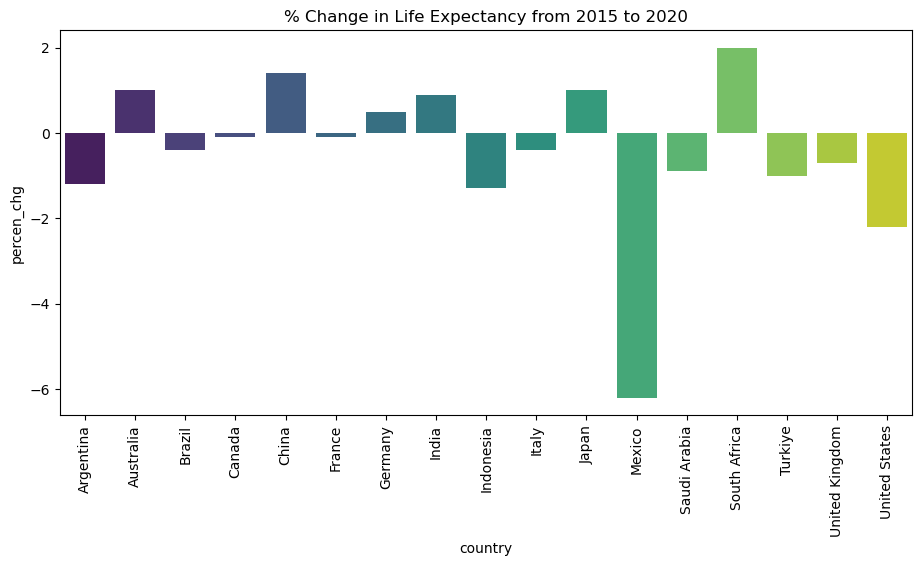

In [62]:
plt.figure(figsize=(11,5))
sns.barplot(x=life_expectancy.index, y=life_expectancy['percen_chg'], palette='viridis')
plt.title("% Change in Life Expectancy from 2015 to 2020")
plt.xticks(rotation =90)
plt.show()

## 13.Foreign direct investment (FDI)

In [63]:
fdi = pd.pivot_table(columns='year_o', index='country', values='Foreign direct investment (FDI)', data=dff, aggfunc='mean').round(1)
fdi['perc_chg'] = round((fdi[2020] - fdi[2015])*100/fdi[2015],1)
fdi = fdi.sort_values(ascending=False, by='perc_chg')

In [64]:
fdi

year_o,2015,2016,2017,2018,2019,2020,perc_chg
country,,,,,,,
Japan,0.1,0.8,0.4,0.5,0.8,1.2,1100.0
United Kingdom,1.5,12.0,4.7,-0.9,0.7,4.9,226.7
South Africa,0.4,0.7,0.5,1.4,1.3,0.9,125.0
Germany,1.9,1.9,3.0,4.2,1.8,3.7,94.7
India,2.1,1.9,1.5,1.6,1.8,2.4,14.3
Mexico,3.1,3.6,2.9,3.1,2.4,2.9,-6.5
Indonesia,2.3,0.5,2.0,1.8,2.2,1.8,-21.7
China,2.2,1.6,1.3,1.7,1.3,1.7,-22.7
Brazil,3.6,4.1,3.3,4.1,3.7,2.6,-27.8


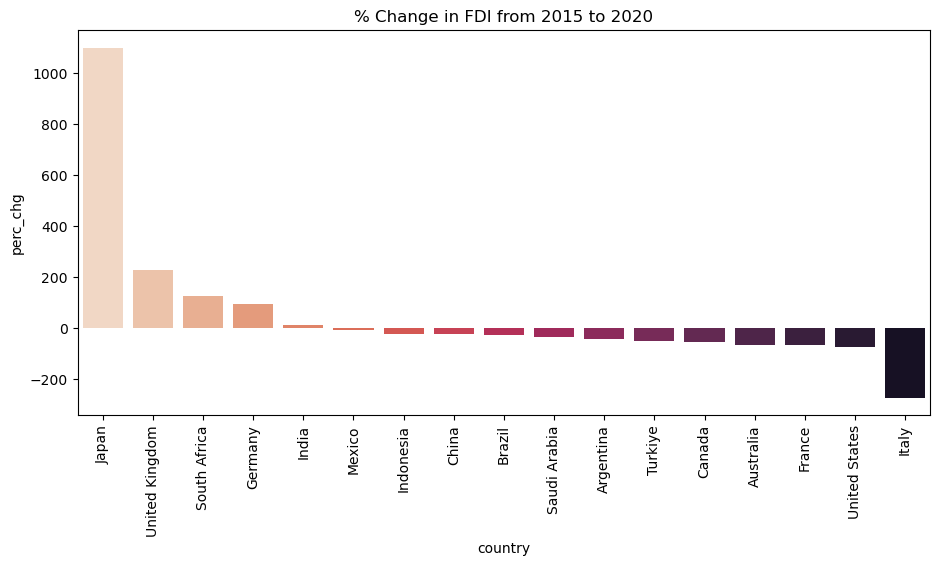

In [65]:
plt.figure(figsize=(11,5))
sns.barplot(x=fdi.index, y=fdi['perc_chg'], palette='rocket_r')
plt.title("% Change in FDI from 2015 to 2020")
plt.xticks(rotation =90)
plt.show()

## 14.Exim(Export and Import)

In [66]:
dff['net_exim_bal'] = dff['Exports of goods and services'] - dff['Imports of goods and services']

In [67]:
dff.head()

,country,year,Gross Domestic Product (GDP),Gross National Income (GNI),Inflation rate,Unemployment rate,Poverty rate,Life expectancy,Literacy rate,Access to electricity,...,Foreign direct investment (FDI),Exports of goods and services,Imports of goods and services,Gross capital formation,Agricultural land area,Agricultural production index,GDP_BN,GNI_BN,year_o,net_exim_bal
0,Argentina,2020-01-01,3.855402e+11,3.755358e+11,NaN,11.460,42.0,75.892,NaN,100.000000,...,1.224943,16.610872,13.608927,14.130595,39.603229,109.35,385.540225,375.535785,2020,3.001945
1,Argentina,2019-01-01,4.477546e+11,4.301667e+11,NaN,9.840,35.5,77.284,NaN,100.000000,...,1.485007,17.924878,14.705737,14.210030,39.603229,112.59,447.754609,430.166721,2019,3.219142
2,Argentina,2018-01-01,5.248197e+11,5.060939e+11,NaN,9.220,32.0,76.999,99.003868,99.989578,...,2.232532,14.436686,16.325850,16.613885,39.603229,97.49,524.819743,506.093901,2018,-1.889164
3,Argentina,2017-01-01,6.436287e+11,6.272007e+11,NaN,8.350,25.7,76.833,NaN,100.000000,...,1.789364,11.320283,13.969318,18.212567,40.647424,106.03,643.628665,627.200729,2017,-2.649034
4,Argentina,2016-01-01,5.575314e+11,5.452507e+11,NaN,8.109,30.3,76.308,99.125008,99.849579,...,0.584750,12.527095,13.566793,17.663228,41.716051,100.95,557.531376,545.250717,2016,-1.039698


In [68]:
exim = pd.pivot_table(index='country',columns='year',values='net_exim_bal',aggfunc = "mean",data=dff).round(2)

In [69]:
exim

year,2015-01-01,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01
country,,,,,,
Argentina,-1.07,-1.04,-2.65,-1.89,3.22,3.00
Australia,-1.49,-2.28,0.51,0.36,2.48,3.78
Brazil,-1.15,0.40,0.72,0.39,-0.64,0.70
Canada,-2.46,-2.36,-2.19,-1.89,-1.60,-2.06
China,3.24,2.27,1.75,0.66,0.93,2.42
France,-0.57,-0.61,-1.06,-1.01,-0.96,-1.96
Germany,7.60,7.38,7.09,6.10,5.65,5.63
India,-2.30,-1.77,-3.16,-3.76,-2.58,-0.39
Indonesia,0.38,0.76,1.00,-1.07,-0.44,1.57


## 15. LinePlot

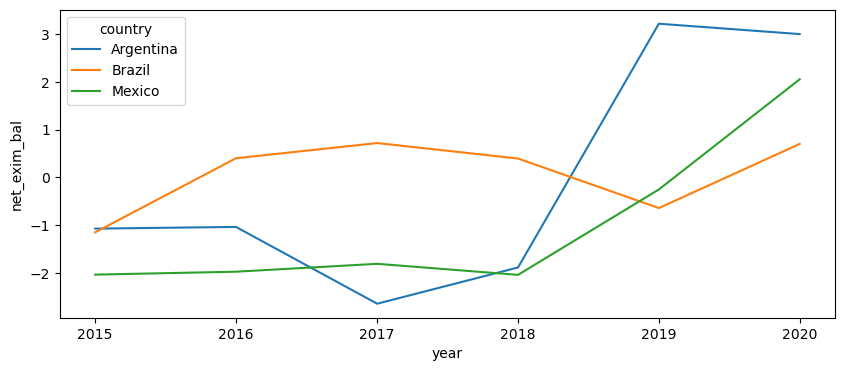

In [70]:
plt.figure(figsize=(10,4))
sns.lineplot(x='year', y='net_exim_bal', data=dff[dff['country'].isin(['Argentina', 'Brazil','Mexico'])], hue='country', ci=False)
plt.show()

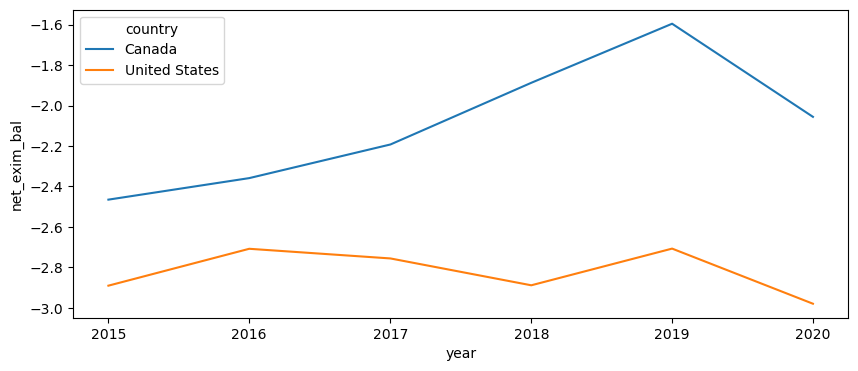

In [71]:
plt.figure(figsize=(10,4))
sns.lineplot(x='year', y='net_exim_bal', data=dff[dff['country'].isin(['Canada','United States'])], hue='country', ci=False)
plt.show()

In [73]:
dff.to_excel("G20_Worldbankdata.xlsx")